In [29]:
import torch
import torchvision as tv
import torch.nn as nn
import matplotlib.pyplot as plt

数据集加载

In [30]:
data_path='./data'
train_data=tv.datasets.FashionMNIST(root=data_path,train=True,download=True,transform=tv.transforms.ToTensor())
test_data=tv.datasets.FashionMNIST(root=data_path,train=False,download=True,transform=tv.transforms.ToTensor())
batch_size=256
train_iter=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True,num_workers=0)
test_iter=torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False,num_workers=0)

In [31]:
#学习torch.Flatten()函数，将连续的维度范围展平为张量
a=torch.randn(31,1,23,23)
b=nn.Flatten()#start-dim=1,end-dim=-1,1*23*23
print(b(a).shape)
c=nn.Flatten(0,2)#start-dim=0,end-dim=2,31*1*23
print(c(a).shape)

torch.Size([31, 529])
torch.Size([713, 23])


模型创建，我通过两种方法创建模型，本次实验采用第二种方法

In [32]:
input_size = 28*28
num_features = 10

In [33]:
# 方法一：编写模型类
class LinearModel(nn.Module):
    def __init__(self, input_size, num_features):
        super(LinearModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(input_size, num_features)
    def forward(self, x):
        x = self.flatten(x)
        return self.linear(x)
net = LinearModel(input_size, num_features)
net

LinearModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [34]:
# 方法二：torch.nn容器
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, num_features)
)
net

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

设置损失函数和优化器

本实验是多分类任务，损失函数选择nn.CrossEntropyLoss(),该函数包括softmax运算和交叉熵损失计算

In [35]:
# 多分类损失函数
loss_func=nn.CrossEntropyLoss()
# 优化器
optimizer=torch.optim.SGD(net.parameters(),lr=1e-2)

初始化模型参数

In [36]:
def init_model_param(m):
    if type(m) is nn.Linear:
        nn.init.normal_(m.weight,mean=0,std=0.01)
        nn.init.constant_(m.bias,val=0)
net.apply(init_model_param)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

模型训练预测

In [37]:
epochs = 50
train_acc, test_acc = [], []
train_loss, test_loss = [], []
for e in range(epochs):
    train_loss_sum = 0
    train_acc_sum = 0
    train_length = 0
    for imgs,labels in train_iter:
        pred = net(imgs)
        los = loss_func(pred, labels)
        optimizer.zero_grad()
        los.backward()
        optimizer.step()
        train_loss_sum += los.item()
        train_acc_sum += (pred.argmax(1) == labels).sum().item()
        train_length += labels.shape[0]
    train_loss.append(train_loss_sum / train_length)
    train_acc.append(train_acc_sum / train_length)
    # 测试集预测
    test_loss_sum, test_acc_sum, test_length = 0, 0, 0
    for x,y in test_iter:
        pred = net(x)
        tlos = loss_func(pred,y)
        test_loss_sum += tlos.item()
        pre = (pred.argmax(dim=1)==y).sum().item()
        test_acc_sum += pre
        test_length += y.shape[0]
    test_loss.append(test_loss_sum/test_length)
    test_acc.append(test_acc_sum/test_length)
    print('epoch %d, loss %.3f, train acc %.3f, test acc %.3f' % (e + 1, train_loss[e], train_acc[e], test_acc[e]))
    print('epoch %d, loss %.3f, train acc %.3f' % (e + 1, train_loss[e], train_acc[e]))

epoch 1, loss 0.005, train acc 0.645, test acc 0.680
epoch 1, loss 0.005, train acc 0.645
epoch 2, loss 0.004, train acc 0.716, test acc 0.725
epoch 2, loss 0.004, train acc 0.716
epoch 3, loss 0.003, train acc 0.750, test acc 0.748
epoch 3, loss 0.003, train acc 0.750
epoch 4, loss 0.003, train acc 0.768, test acc 0.761
epoch 4, loss 0.003, train acc 0.768
epoch 5, loss 0.003, train acc 0.780, test acc 0.769
epoch 5, loss 0.003, train acc 0.780
epoch 6, loss 0.003, train acc 0.789, test acc 0.781
epoch 6, loss 0.003, train acc 0.789
epoch 7, loss 0.003, train acc 0.796, test acc 0.784
epoch 7, loss 0.003, train acc 0.796
epoch 8, loss 0.002, train acc 0.800, test acc 0.788
epoch 8, loss 0.002, train acc 0.800
epoch 9, loss 0.002, train acc 0.804, test acc 0.792
epoch 9, loss 0.002, train acc 0.804
epoch 10, loss 0.002, train acc 0.808, test acc 0.795
epoch 10, loss 0.002, train acc 0.808
epoch 11, loss 0.002, train acc 0.810, test acc 0.799
epoch 11, loss 0.002, train acc 0.810
epoch 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

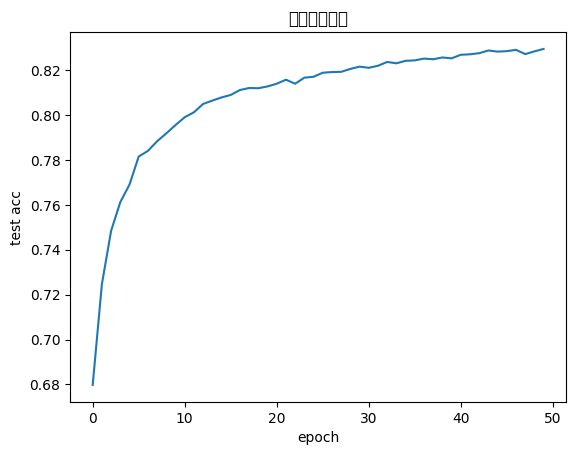

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

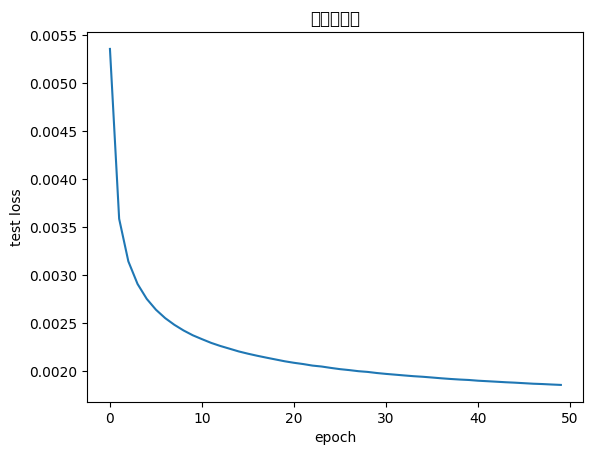

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

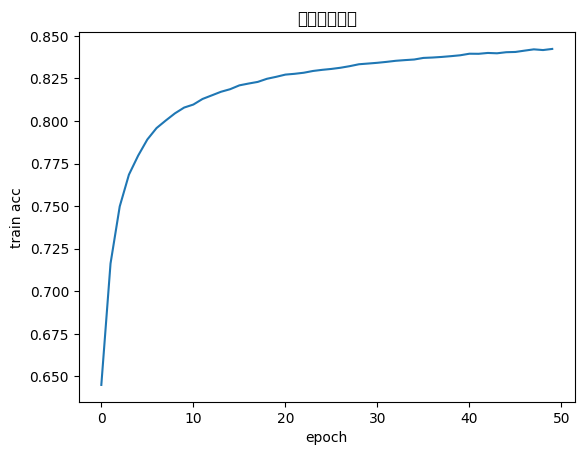

In [38]:
#解决中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot(range(epochs), test_acc)
plt.xlabel('epoch')
plt.ylabel('test acc')
plt.title("测试集准确度")
plt.show()

plt.plot(range(epochs), train_loss)
plt.xlabel('epoch')
plt.ylabel('test loss')
plt.title("训练集损失")
plt.show()

plt.plot(range(epochs), train_acc)
plt.xlabel('epoch')
plt.ylabel('train acc')
plt.title("训练集准确度")
plt.show()

实验结果分析

当设置学习率为0.01时，模型收敛速度较慢，相同epoch下测试集准确率不高，因此增大学习率为0.1，模型收敛速度较快，在测试集上的准确率也有了提升。据可视化的实验结果，模型在训练集上的损失逐渐降低，准确度逐渐升高。虽然模型在测试集的准确度曲线有明显波动，中途会有下降，但总体还是呈上升趋势。